#NOTEBOOK 2: Análisis Exploratorio de Datos
En este notebook nos centraremos en el análisis exploratorio de datos, es decir, en el análisis de datos con múltiples variables y en la búsqueda de posibles correlaciones entre ellas.
 Primero, veremos cómo cargar sets de datos al entorno de Google Colab, luego usaremos métodos visuales como histogramas, boxplots y violin plots aplicados a las variables de un dataset de vinos. Luego, tomaremos un enfoque para encontrar una correlación entre ellos usando un heatmap. Por último, presentaremos diferentes algoritmos utilizados para la reducción de variables.


## Tabla de Contenidos
---

* [Visualizaciones](#Visualizaciones)
  * [Histogramas](##Histogramas)
  * [Boxplots](##Boxplots)
  * [Violin Plots](##Violin_Plots)
* [Análisis de Correlación](#Análisis_de_Correlación)
  * [Heatmap](##Heatmap)
  * [Pair Plot](##Pair_Plot)


#Importar de una URL




Si el dataset está en una página web, puede subirse a Google Colab copiando la URL y pegándola entre las comillas en el comando **df = pd.read_csv (" ")**. Pueden agregarse otros parámetros para refinar el procesamiento de este archivo. Por ejemplo, el delimitador es una secuencia de caracteres que separa regiones en un texto plano.

In [ ]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##Importar módulos que no están presentes en Google Collab
Podemos agregar nuevos módulos porque estamos utilizando una "computadora prestada" de google, que contiene Python 3.
Utilizando el síímbolo "!" podemos ejecutar comandos como si estuviéramos utilizando la terminal. En el caso de los Jupyter Notebooks, utilizamosun tipo de consola de linea de comando de Python llamado IPython.
En esta ocasión instalaremos un paquete de estadística llamado "Pinguoin". El comando "pip install" será utilizado para descargar e instalar librerias externas en esta computadora prestada.

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=b4441e9950c9dc1ad831d3c0272466e72a5eda174a016d2ef1aa481e73c2d31e
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


## Método útil y sencillo para describir estadísticamente.



In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Comenzamos con el análisis exploratorio de datos....
---

<b>Descripción del dataset:</b>

Este dataset contiene información sobre vinos tintos. Algunas variables son de composición química y variables fisicoquímicas, y la calidad es una clasificación sensitiva.

<b>URL del dataset: </b>

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

<b>Número de Instancias:</b>

1599 vinos tintos

<b>Información de las variables:</b>

>    1 - fixed acidity <br>
   2 - volatile acidity<br>
   3 - citric acid<br>
   4 - residual sugar<br>
   5 - chlorides<br>
   6 - free sulfur dioxide<br>
   7 - total sulfur dioxide<br>
   8 - density<br>
   9 - pH<br>
   10 - sulphates<br>
   11 - alcohol<br>
   12 - quality



# Visualizaciones
---

El análisis exploratorio de datos es una aproximación para analizar conjuntos de datos y resumir sus características principales, a menudo con métodos visuales. Vamos a abordar algunas técnicas básicas para comprender cómo se comportan los datos y esto podría ayudarnos a decidir, por ejemplo, qué métodos emplear.

En primer lugar, como siempre, tenemos que importar el dataset.


In [ ]:
#Importamos las librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Cargamos el set de datos:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##Histogramas

Se puede ver el histograma de la variable "alcohol" con el método `.hist` de Matplotlib

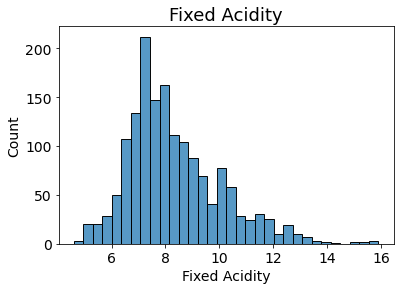

In [ ]:
#Graficar el histograma en Seaborn:
hist=sns.histplot(x="fixed acidity", data = df)
#Título, títulos de ejes, y tamaño de ticks:
hist.axes.set_title("Fixed Acidity",fontsize=18)
hist.set_xlabel("Fixed Acidity",fontsize=14)
hist.set_ylabel("Count",fontsize=14)
hist.tick_params(labelsize=14)

También se pueden hacer histogramas de todas las variables y mostrarlos juntos en forma de matriz

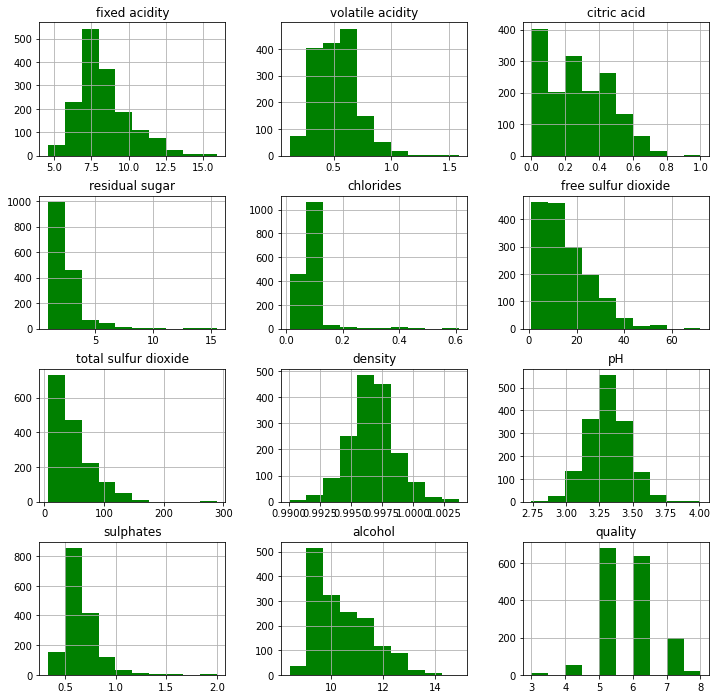

In [ ]:
df.hist(figsize=(12,12), color="green")
plt.show()

##Boxplots
Podemos hacer boxplots para cada variable, este tipo de gráfico nos permite, entre otras cosas, visualizar fácilmente los outliers. Recordemos lo que es un boxplot: Un boxplot es un gráfico unidimensional sencillo que muestra todos los valores de una variable del dataset, especificando los valores mínimo y máximo en los bordes, y el primer, segundo (mediana) y tercer cuartil en el interior de la caja.
Acá los vamos a plotear con Seaborn



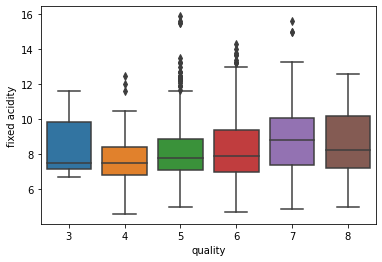

In [ ]:
#Graficar boxplot en Seaborn:
sns.boxplot(y='fixed acidity',x="quality", data = df,orient="v")

Veamos boxplots conjuntos para todas las variables:

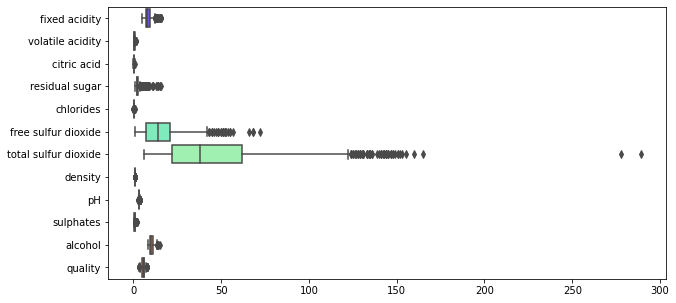

In [ ]:
#Graficamos boxplots para todas las variables:
ax = sns.boxplot(data=df, orient="h", palette="rainbow")
#Especifico tamaño de la figura con Matplotlib, se usa plt.gcf (que significa Get current figure): 
plt.gcf().set_size_inches(10, 5)
plt.show()

Como podemos ver, los valoresde las variabes están en escalas diferentes. Para visualizarlo mejor, apliquemos escala logarítmica: 


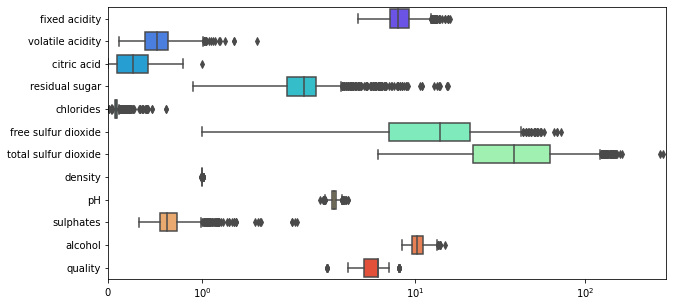

In [ ]:
#Vuelvo a graficar los boxplots:
ax = sns.boxplot(data=df, orient="h", palette="rainbow")
#Seteo la escala de eje x en escala logarítmica:
ax.set_xscale('symlog')
#Especifico desde dónde hasta dónde quiero que me grafique el eje x:
ax.axis(xmin=0, xmax=300)
#Seteo tamaño de la figura:
plt.gcf().set_size_inches(10, 5)

Como podemos ver, las medias de los datos varían mucho. Esto ocurre porque los datos están en diferentes escalas, lo que significa que se utilizan diferentes unidades para medir las diferentes características. Es posible **normalizar o escalar los datos**, lo que significa centrar la media de los datos. Un método común es estandarizar las variables restando la media de la columna y dividiéndola por la varianza, haciendo esto, nos quedan nuevos valores dentro de cada columna para los cuales $\mu=0$ y $\sigma=1$ . Scikit-learn tiene un módulo para esto llamado "preprocessing", que usaremos en el próximo ejemplo. Para más información sobre esto, revisar la [documentación de Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')


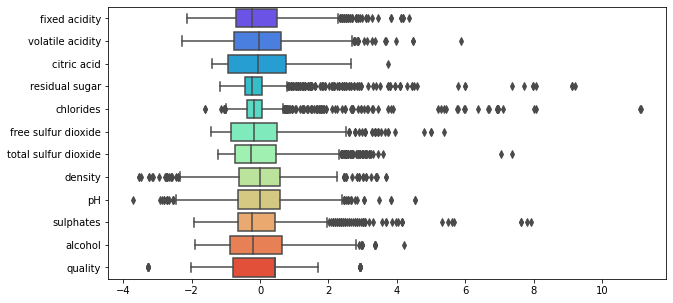

In [ ]:
#Importo la función StandardScaler de la librería ScikitLearn
from sklearn.preprocessing import StandardScaler

#Hago un nuevo objeto con los datos normalizados:
scaled = StandardScaler().fit_transform(df)  #El método fit.transform() ajusta estos nuevos valores a los datos y los almacena, reemplazando los valores anteriores.

#Hago un nuevo dataframe normalizado, lo llamo "df_scaled":
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

#Grafico boxplots de las variables de ese nuevo dataframe (con Seaborn):
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Seteo tamaño de  la figura del gráfico de Seaborn (con Matplotlib) 
plt.gcf().set_size_inches(10, 5)

Otra forma de visualizar mútiples boxplots es en forma de matriz. En este caso, usamos una función de la librería Pandas llamada `plot()`. 

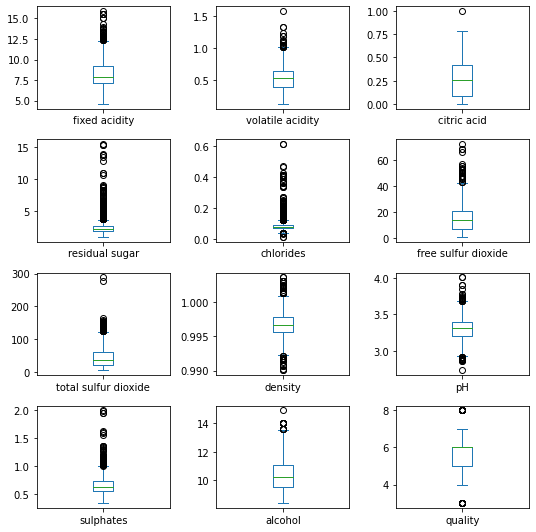

In [ ]:
#Grafico boxplots directamente con Pandas, en forma de matriz de 4 x 3 :
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(7.5,7.5))
plt.tight_layout()

#Violin Plots
Los Violin Plots pueden usarse para visualizar la información contenida en un boxplot, es decir, la media, los cuartiles, y los valores máximo y mínimo, agregando además la información de la distribución de los datos. 

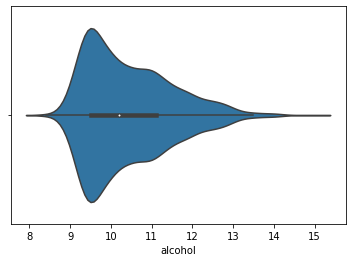

In [ ]:
sns.violinplot(x="alcohol",data=df)

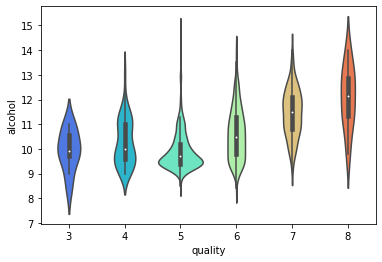

In [ ]:
sns.violinplot(x = 'quality', y = 'alcohol', data = df, palette="rainbow")

#Análisis de Correlación
---

Otro aspecto importante para entender nuestros datos es estudiar la correlación entre las variables. Si queremos, por ejemplo, ver la correlación entre el pH y la acidez fija, podemos hacer este gráfico de dispersión con histogramas marginales usando "`sns.jointplot`"


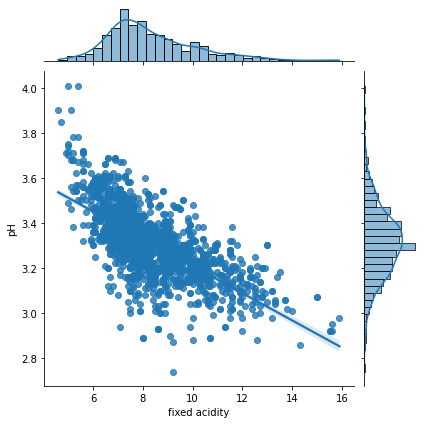

In [ ]:
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df, kind='reg')

A primera vista, como la pendiente no es muy pronunciada, se puede inferir que la relación no es exactamente lineal y la correlación es baja.

##Coeficiente de Correlación de Pearson
 Podemos calcular la correlación entre dos variables con el coeficiente de correlación _Pearson_ y el _p-valor_.

El _coeficiente de correlación de Pearson_ ($\rho$) nos permite observar fácilmente las dependencias lineales entre dos datasets. 
* Un valor de +1 significa correlación lineal positiva total, 
*0 significa que no hay correlación lineal, y
*-1, correlación lineal negativa total. 

Las correlaciones positivas implican que a medida que x aumenta, también lo hace y. Las correlaciones negativas implican que a medida que x aumenta y disminuye.

El _p-valor_ indica aproximadamente la probabilidad de que los conjuntos de datos no correlacionados tengan un coeficiente de correlación _Pearson_ al menos tan extremo como el determinado para esos conjuntos de datos. Si esta probabilidad es inferior al 5% (P<0,05), significa que el coeficiente de correlación es estadísticamente significativo.

**Hay que tener cuidado porque la correlación no implica causalidad. Cuando dos variables están correlacionadas, puede haber o no una conexión causal, y esta conexión puede ser además indirecta.**



In [ ]:
#importo la  función PearsonR del módulo "stats" librería SciPy
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson_corr))
    print("El P-valor de esta correlación es {:.1e}".format(p_value))
get_corr('fixed acidity', 'pH', df)

La correlación entre fixed acidity y pH es -0.68
El P-valor de esta correlación es 4.1e-220


Tiene sentido que la acidez fija tenga una correlación negativa con el pH ( $\rho$ = -0,68 ) (lo verificamos haciendo el scatterplot unas cuantas celdas atrás). Aunque no es completamente lineal, como esperábamos de nuestros conocimientos de química.


##Heatmap

Podemos crear un DataFrame con el coeficiente de correlación de Pearson para cada par de columnas (usando la función `df.corr()`) y luego, usar Matplotlib y Seaborn para crear un _heatmap_  ("Mapa de calor") de los coeficientes.


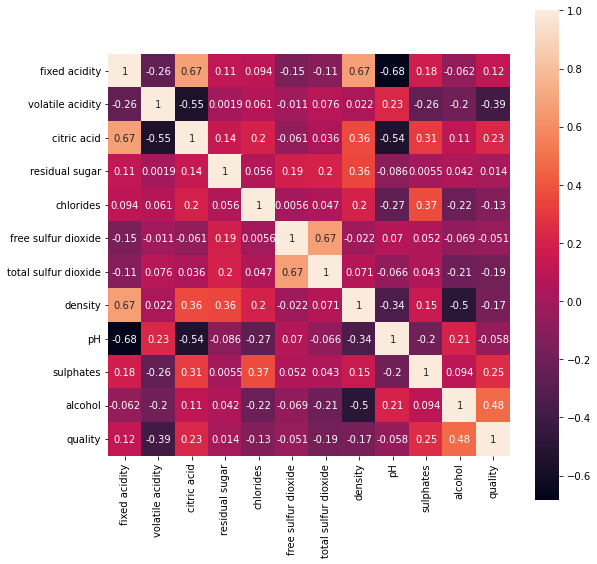

In [ ]:
# Calculamos la correlación con el coeficiente de Pearson usando Pandas:
correlation = df.corr(method='pearson')
# Creamos una nueva figura con Matplotlib y seteamos el tamaño:
fig=plt.gcf()
fig.set_size_inches(9,9)
# Heatmap de correlación usando Seaborn:
sns.heatmap(correlation, annot=True,square=True)

 Cuando se comparan varias variables al mismo tiempo es difícil comprender cómo se comportan los datos. Así que podríamos añadir al heatmap los coeficientes de cada comparación y trazar sólo la matriz de correlación triangular inferior (ya que es un gráfico simétrico, y la información del triángulo superior es redundante).


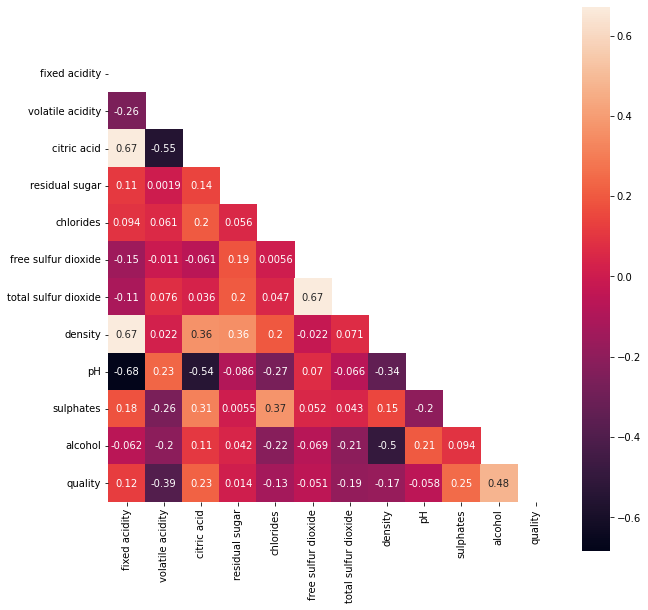

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
correlation = df.corr()
# np.triu es una función de Numpy que agarra un array en forma de matriz cuadrada y me da el triángulo superior de esa matriz cuadrada
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

##Pair Plot

Otra forma de visualizar la correlación entre las variables
es trazar una matriz de correlación con la función `pairplot` de Seaborn. Por ejemplo, acá trazamos la correlación de cuatro de las columnas del dataset: 'fixed acidity', 'volatile acidity', 'citric acid' (todos los tipos de acidez) y 'pH'.


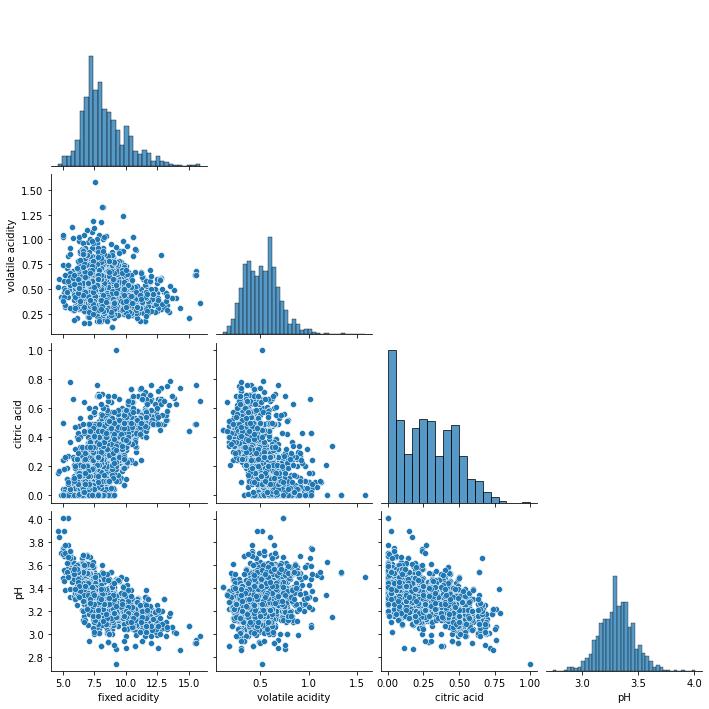

In [ ]:
sns.pairplot(df[['fixed acidity','volatile acidity','citric acid', 'pH']], corner=True) #corner=True hides the upper portion of the matrix